<a href="https://colab.research.google.com/github/dandamudi-geeta/Reinforcement-Learning/blob/main/2348512_RL(Lab7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Grid-world parameters
GRID_SIZE = 5
GOAL_STATE = (4, 4)
DISCOUNT_FACTOR = 0.9  # Gamma
LEARNING_RATE = 0.1   # Alpha

In [3]:

# Initialize the state-value function
state_values = np.zeros((GRID_SIZE, GRID_SIZE))


In [4]:

# Actions: Up, Down, Left, Right
ACTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]


In [7]:
def is_valid_state(state):
    """Check if a state is within the grid."""
    return 0 <= state[0] < GRID_SIZE and 0 <= state[1] < GRID_SIZE

def get_next_state(state, action):
    """Get the next state given the current state and action."""
    next_state = (state[0] + action[0], state[1] + action[1])
    return next_state if is_valid_state(next_state) else state

def get_reward(state):
    """Reward function."""
    return 1 if state == GOAL_STATE else 0


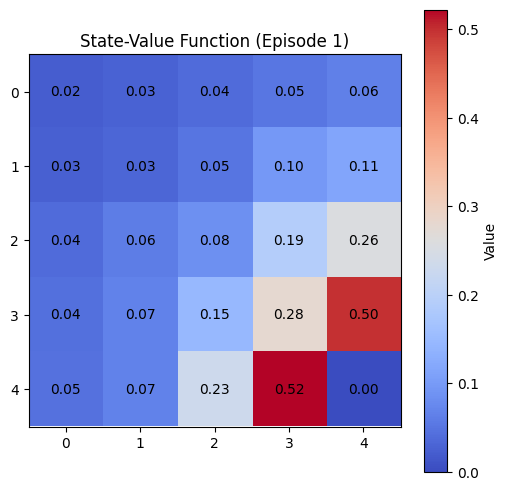

In [13]:
def visualize_grid(state_values, episode=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(state_values, cmap='coolwarm', interpolation='nearest')
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            plt.text(j, i, f"{state_values[i, j]:.2f}",
                     ha='center', va='center', color='black')
    plt.title(f"State-Value Function (Episode {episode})")
    plt.colorbar(label="Value")
    plt.show()

visualize_grid(state_values, episode=1)

In [10]:
# Training loop
EPISODES = 50
for episode in range(1, EPISODES + 1):
    state = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))  # Random start
    while state != GOAL_STATE:
        # Choose a random action
        action = random.choice(ACTIONS)

        # Transition to next state
        next_state = get_next_state(state, action)

        # Get reward and update state-value
        reward = get_reward(next_state)
        td_target = reward + DISCOUNT_FACTOR * state_values[next_state]
        td_error = td_target - state_values[state]
        state_values[state] += LEARNING_RATE * td_error

        # Move to the next state
        state = next_state



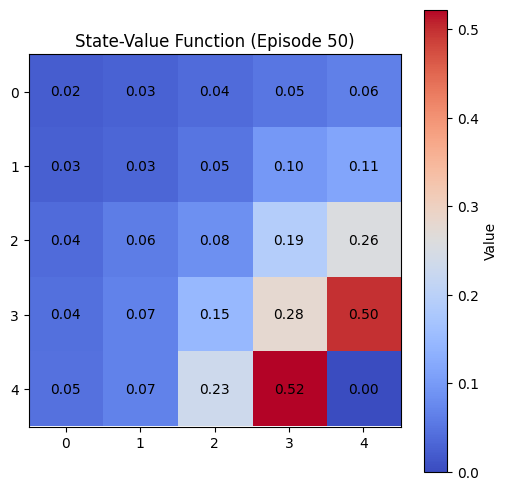

In [12]:
 # Visualize every 10 episodes
if episode % 10 == 0:
        visualize_grid(state_values, episode)
